Fourier Series

Q1-A

In [15]:
import numpy as np


def fourier_series(x_t, t, n):
    a_n = np.zeros(n)
    b_n = np.zeros(n)
    T = abs(t[-1] - t[0])
    for i in range(n):
        a_n[i] = 2 / T * np.trapz(x_t * np.cos(2 * np.pi * i * t / T), t)
        b_n[i] = 2 / T * np.trapz(x_t * np.sin(2 * np.pi * i * t / T), t)
    a_0 = 2 / T * np.trapz(x_t, t)
    return a_0, a_n, b_n

Q1-B

In [16]:
def inverse_fourier_series(x_t, t, n):
    a_0, a_n, b_n = fourier_series(x_t, t, n)
    T = abs(t[-1] - t[0])
    x_t_hat = a_0 / 2
    for i in range(n):
        x_t_hat += a_n[i] * np.cos(2 * np.pi * i * t / T) + b_n[i] * np.sin(2 * np.pi * i * t / T)
    return x_t_hat

Q1-C

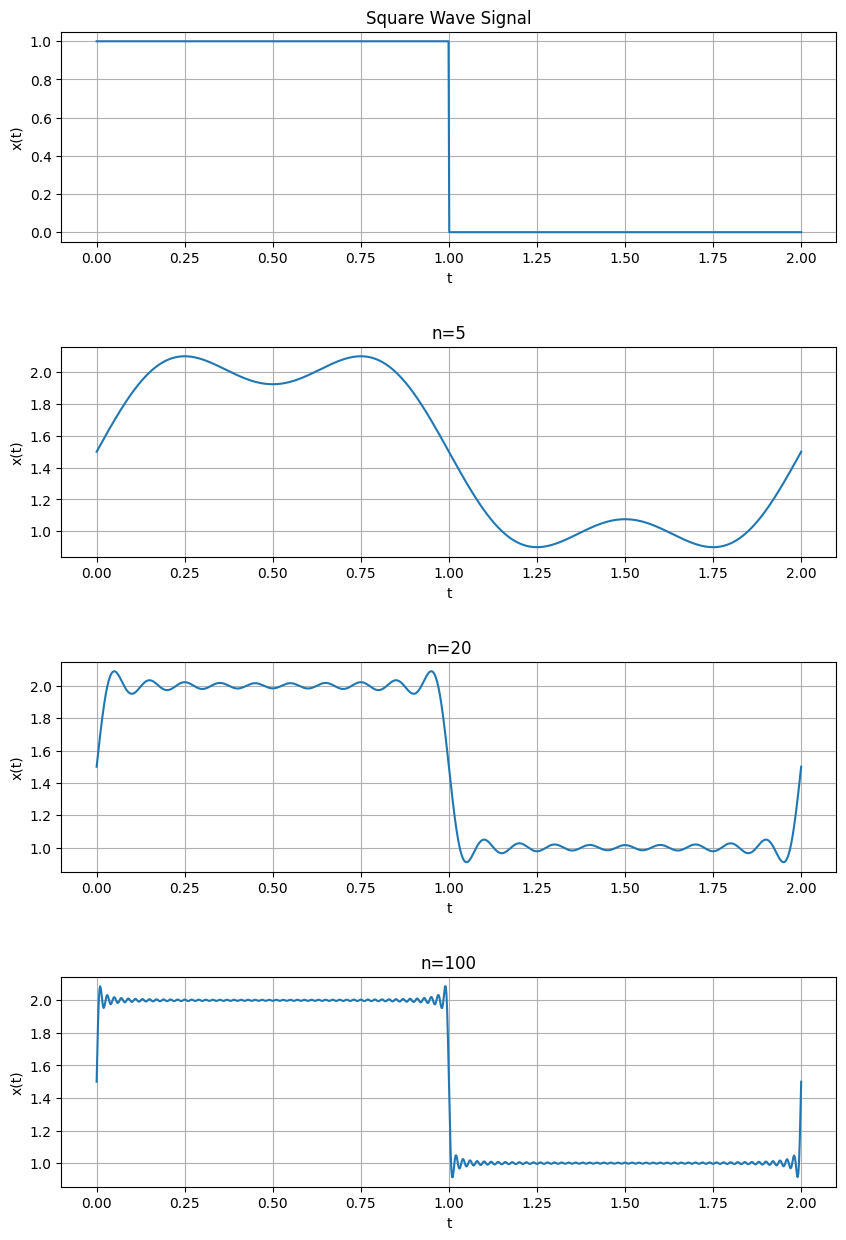

In [17]:
import matplotlib.pyplot as plt

# square wave signal
x = np.linspace(0, 2, 1000)
x_t = np.zeros(1000)
x_t[0:500] = 1
x_t[500:] = 0

# plot the square wave signal
plt.figure(figsize=(10, 15))
plt.subplot(4, 1, 1)
plt.plot(x, x_t)
plt.title('Square Wave Signal')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

# plot the square wave signal with n=5
x_t_hat = inverse_fourier_series(x_t, x, 5)
plt.subplot(4, 1, 2)
plt.plot(x, x_t_hat)
plt.title('n=5')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

plt.subplots_adjust(hspace=0.5)

# plot the square wave signal with n=20
x_t_hat = inverse_fourier_series(x_t, x, 20)
plt.subplot(4, 1, 3)
plt.plot(x, x_t_hat)
plt.title('n=20')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

# plot the square wave signal with n=100
x_t_hat = inverse_fourier_series(x_t, x, 100)
plt.subplot(4, 1, 4)
plt.plot(x, x_t_hat)
plt.title('n=100')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

plt.show()

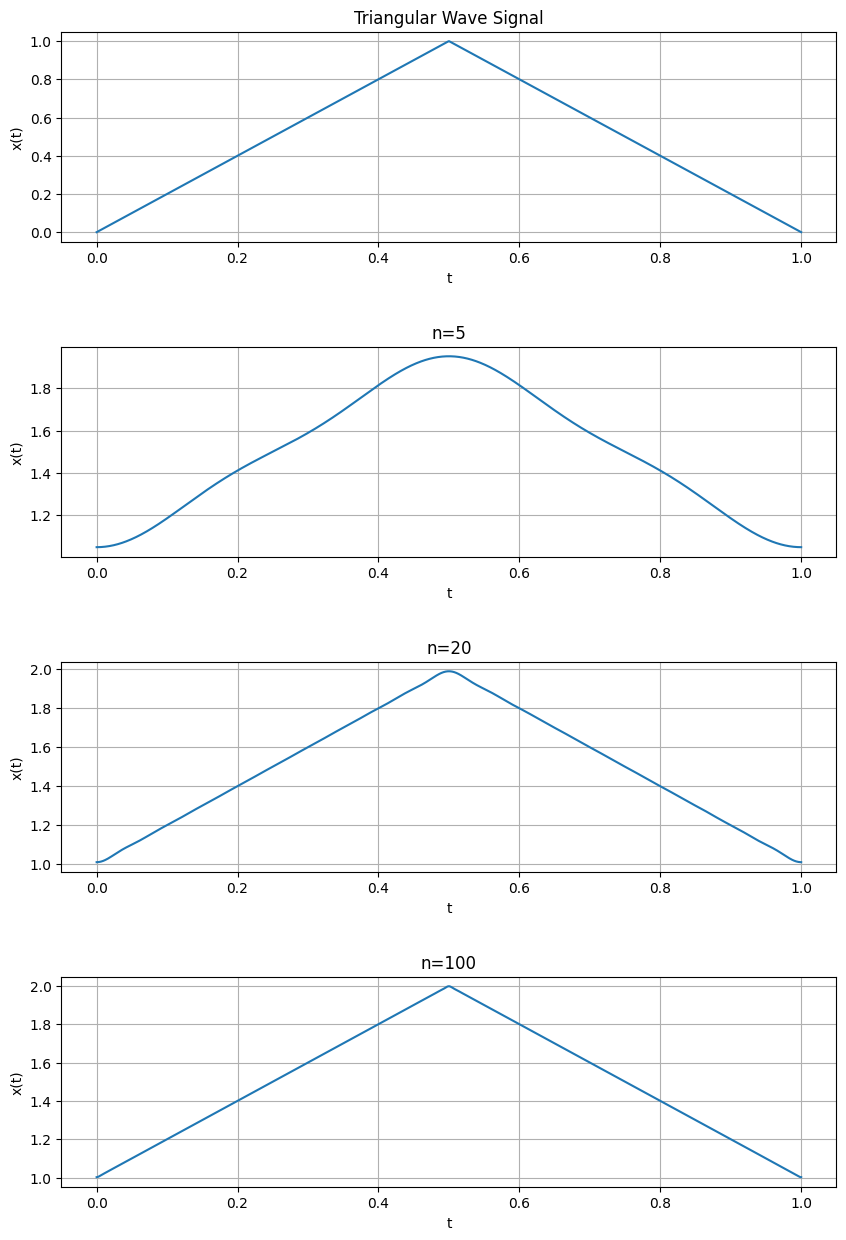

In [18]:
# triangular wave signal
x = np.linspace(0, 1, 1000)
x_t = np.zeros(1000)
x_t[0:500] = x[0:500] * 2
x_t[500:] = 2 - x[500:] * 2

# plot the triangular wave signal
plt.figure(figsize=(10, 15))
plt.subplot(4, 1, 1)
plt.plot(x, x_t)
plt.title('Triangular Wave Signal')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

# plot the triangular wave signal with n=5
x_t_hat = inverse_fourier_series(x_t, x, 5)
plt.subplot(4, 1, 2)
plt.plot(x, x_t_hat)
plt.title('n=5')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

plt.subplots_adjust(hspace=0.5)

# plot the triangular wave signal with n=20
x_t_hat = inverse_fourier_series(x_t, x, 20)
plt.subplot(4, 1, 3)
plt.plot(x, x_t_hat)
plt.title('n=20')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

# plot the triangular wave signal with n=100
x_t_hat = inverse_fourier_series(x_t, x, 100)
plt.subplot(4, 1, 4)
plt.plot(x, x_t_hat)
plt.title('n=100')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

Fourier Transform

Q2-A

In [19]:
def fourier_transform(x_t, t, w):
    X_w = np.zeros(len(w), dtype=complex)
    for i in range(len(w)):
        X_w[i] = np.trapz(x_t * np.exp(-1j * w[i] * t), t)
    return X_w

Q2-B

In [20]:
def inverse_fourier_transform(X_w, w, t):
    x_t = np.zeros(len(t), dtype=complex)
    for i in range(len(t)):
        x_t[i] = np.trapz(X_w * np.exp(1j * w * t[i]), w) / (2 * np.pi)
    return x_t

Q2-C

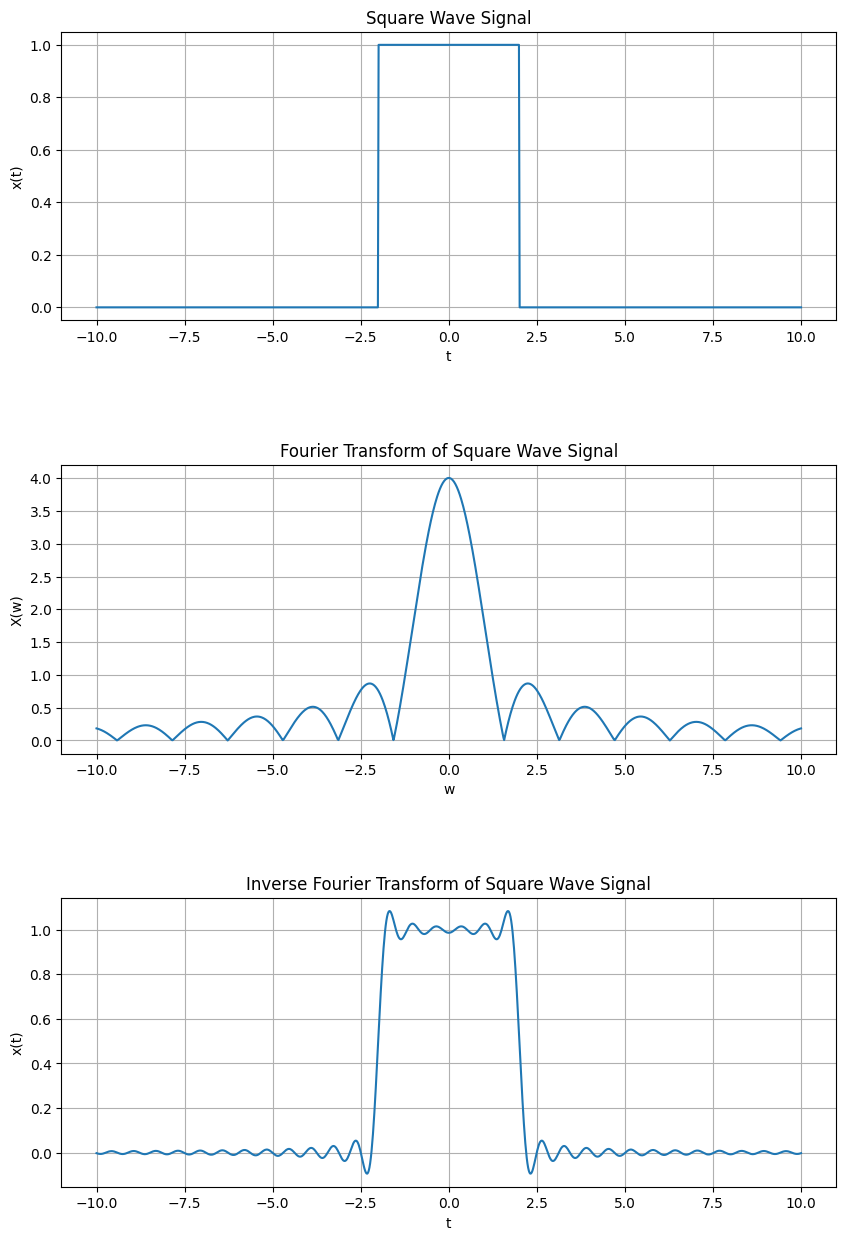

In [21]:
# square wave signal
x = np.linspace(-10, 10, 1000)
x_t = np.zeros(1000)
x_t[400:600] = 1

# plot the square wave signal
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.plot(x, x_t)
plt.title('Square Wave Signal')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

plt.subplots_adjust(hspace=0.5)

# fourier transform of the square wave signal
w = np.linspace(-10, 10, 1000)
X_w = fourier_transform(x_t, x, w)
plt.subplot(3, 1, 2)
plt.plot(w, np.abs(X_w))
plt.title('Fourier Transform of Square Wave Signal')
plt.xlabel('w')
plt.ylabel('X(w)')
plt.grid()

# inverse fourier transform of the square wave signal
x_t_hat = inverse_fourier_transform(X_w, w, x)
plt.subplot(3, 1, 3)
plt.plot(x, x_t_hat)
plt.title('Inverse Fourier Transform of Square Wave Signal')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

Q3

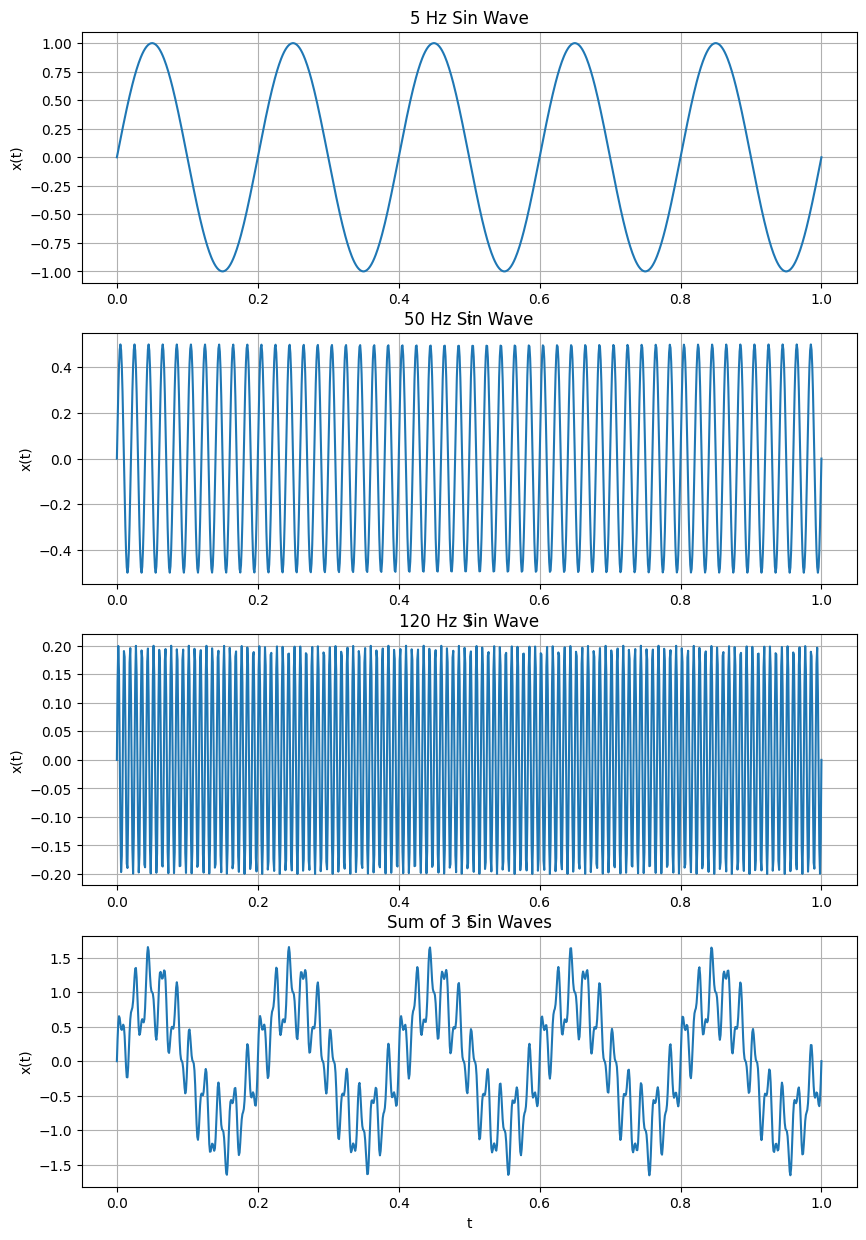

In [22]:
# 3 sin waves with 5, 50, 120 Hz and domains of 1, 0.5, 0.2
T = 1/1000
t = np.linspace(0, 1, 1000)
x_t1 = np.sin(2 * np.pi * 5 * t)
x_t2 = 0.5 * np.sin(2 * np.pi * 50 * t)
x_t3 = 0.2 * np.sin(2 * np.pi * 120 * t)

# sum up the 3 sin waves
main_signal = x_t1 + x_t2 + x_t3

# plot all 4 signals
plt.figure(figsize=(10, 15))
plt.subplot(4, 1, 1)
plt.plot(t, x_t1)
plt.title('5 Hz Sin Wave')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(t, x_t2)
plt.title('50 Hz Sin Wave')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(t, x_t3)
plt.title('120 Hz Sin Wave')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(t, main_signal)
plt.title('Sum of 3 Sin Waves')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

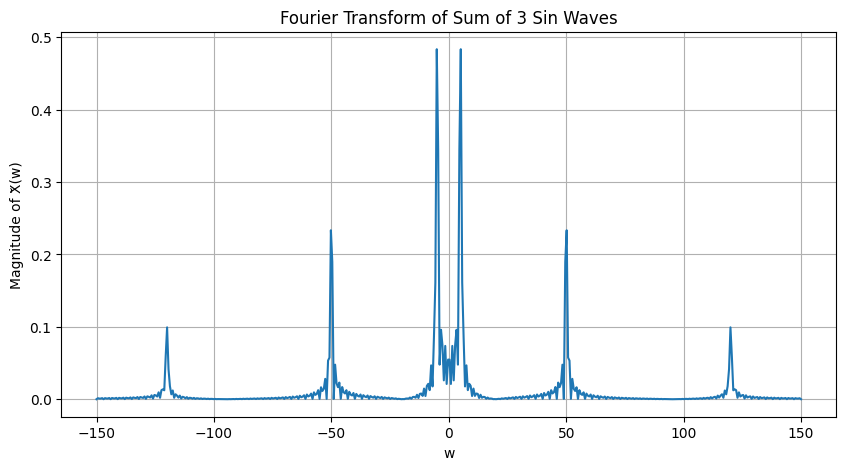

In [25]:
# calculate the fourier transform of the main signal
w = 2 * np.pi * np.linspace(-150, 150, 500)
X_w = fourier_transform(main_signal, t, w)

# plot the magnitude of the Fourier Transform
plt.figure(figsize=(10, 5))
plt.plot(w/(2*np.pi), np.abs(X_w))
plt.title('Fourier Transform of Sum of 3 Sin Waves')
plt.xlabel('w')
plt.ylabel('Magnitude of ٓX(w)')
plt.grid()
